In [1]:
import riskModelBuilder as rmb
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import preprocessing as skpre
from matplotlib import pyplot as plt
import seaborn as sb

In [ ]:
min_set = [
    'index',
    'addedroadt',
    'accesscont',
    'adtderivat',
    'adtstation',
    'adtyear',
    'assigned_1',
    'assignedle',
    'city',
    'county',
    'crn',
    'curbs',
    'dateactive',
    'equation_1',
    'equationro',
    'facilityty',
    'federalaid',
    'fromcity',
    'fromendtyp',
    'frommeasur',
    'fromstate',
    'fromstreet',
    'functional',
    'futurefaci',
    'hpmscode',
    'hpmssample',
    'iri',
    'iriyear',
    'iristatus',
    'item_id',
    'jurisdicti',
    'leftshou_1',
    'leftshould',
    'leftsidewa',
    'lifecycles',
    'massdothig',
    'mhs',
    'mileagecou',
    'mpo',
    'municipals',
    'naccidents',
    'nhsstatus',
    'numberofpe',
    'opposingdi',
    'oppositenu',
    'psi',
    'psiyear',
    'rightsho_1',
    'rightshoul',
    'rightsidew',
    'rpa',
    'roadinvent',
    'roadsegmen',
    'routedirec',
    'routefrom',
    'routequali',
    'routekey',
    'routenumbe',
    'routesyste',
    'routeto',
    'routetype',
    'urbanizeda',
    'undivide_1',
    'undividedl',
    'shape_len',
    'speedlimit',
    'streetlist',
    'streetna_1',
    'streetname',
    'streetoper',
    'subroute',
    'surfacetyp',
    'surfacewid',
    'tocity',
    'toendtype',
    'tollroad',
    'tomeasure',
    'tostate',
    'tostreetna',
    'trucknetwo',
    'truckroute']

In [2]:
min_set = [
    'naccidents',
    'adt'
]

In [ ]:
mb.traindata.shape

In [3]:
# Gather all data and do some cleaning

mb = rmb.Alldata('roadInventory', 'segments_full')
mb.getData()
mb.cleanData(todrop=min_set)

In [29]:
tested = mb.test[35000:, :]
N = mb.test[35000:,:].shape[0]
N2 = mb.test[35000:,:].shape[1]
b = np.zeros((N, N2 + 2))
b[:,:-2] = mb.test[35000:,:]
b[:,-2] = y_test
b[:,-1] = rf_pred

In [30]:
np.savetxt('prediction.csv', b, delimiter = ',')

In [4]:
# Perform a random forest regression 

trainer = rmb.Model()

y = mb.traindata[:,-1]
X = mb.traindata[:,:-1]

n_estimators = 100
test_frac = 0.4
#score, oob_score, rf_pred, x_test, y_test= trainer.rf_regression(X, y, n_estimators, test_frac)

##### HACK
score, oob_score, rf_pred, x_test, y_test= trainer.rf_regression_hack(X, y, n_estimators, test_frac)
pred_max = np.max(rf_pred)

In [ ]:
x_test[:,387].shape

'plt.savefig(\'/home/louisf/Documents/Insight/massdriver/analyses/rf_no_adt_{0}est.png\'.format(str(n_estimators)),\n            dpi=300,\n           bbox_inches="tight")'

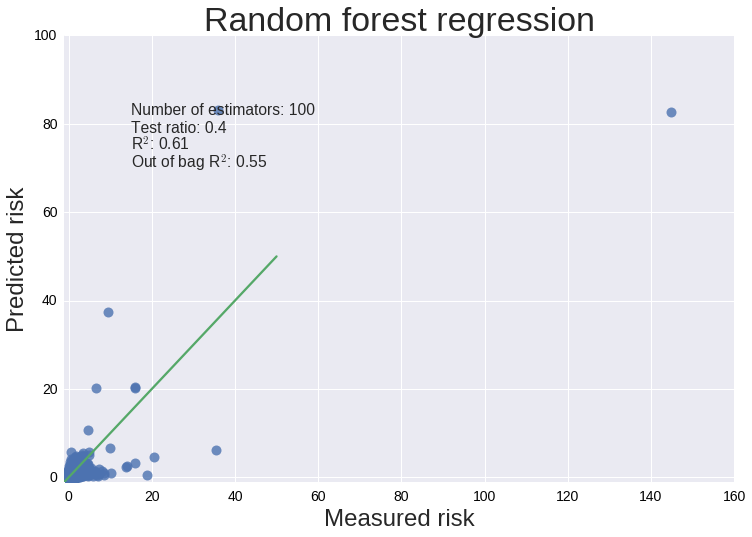

In [5]:
fig = sb.regplot(y_test, rf_pred, fit_reg=False, scatter_kws={"s":100})
import seaborn as sb
sb.set_context('talk')
fig.set(ylim=[-1, None], xlim=[-1, None])

fig.figure.set_size_inches(12,8)
fig.axes.set_title('Random forest regression', fontsize=34)
fig.set_xlabel("Measured risk",size = 24)
fig.set_ylabel("Predicted risk",size = 24)
fig.tick_params(labelsize=14,labelcolor="black")

fig.text(15, pred_max-1, 'Number of estimators: {0}'.format(n_estimators))
fig.text(15, pred_max-5, 'Test ratio: {0}'.format(test_frac))
fig.text(15, pred_max-9, r'R$^2$: {0}'.format(round(score,2)))
fig.text(15, pred_max-13, 'Out of bag R$^2$: {0}'.format(round(oob_score,2)))

fig.plot(np.linspace(-5,50, 1000), np.linspace(-5, 50, 1000))

"""plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/rf_no_adt_{0}est.png'.format(str(n_estimators)),
            dpi=300,
           bbox_inches="tight")"""

In [ ]:
fig = sb.regplot(y_test, rf_pred, fit_reg=False, scatter_kws={"s":100})
import seaborn as sb
sb.set_context('talk')
fig.set(ylim=[-1, 10], xlim=[-1, 10])

fig.figure.set_size_inches(12,8)
fig.axes.set_title('Random forest regression', fontsize=34)
fig.set_xlabel("Measured risk",size = 24)
fig.set_ylabel("Predicted risk",size = 24)
fig.tick_params(labelsize=14,labelcolor="black")
"""
fig.text(15, pred_max-1, 'Number of estimators: {0}'.format(n_estimators))
fig.text(15, pred_max-5, 'Test ratio: {0}'.format(test_frac))
fig.text(15, pred_max-9, r'R$^2$: {0}'.format(round(score,2)))
fig.text(15, pred_max-13, 'Out of bag R$^2$: {0}'.format(round(oob_score,2)))
"""
fig.plot(np.linspace(-5,50, 1000), np.linspace(-5, 50, 1000))

plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/rf_no_adt_{0}est_zoom.png'.format(str(n_estimators)),
            dpi=300,
           bbox_inches="tight")

In [ ]:
# Perform an univariate analysis to look for linearities

for i in range(0,mb.test.shape[1]-1):
    n = plt.figure(i)
    fig = sb.regplot(X[:,i], y, fit_reg=False, scatter_kws={"s":100})
    fig.axes.set_title('Univariate analysis', fontsize=34)
    fig.set_xlabel("var number {0}".format(str(i)),size = 24)
    fig.set_ylabel("",size = 24)
    plt.savefig('/home/louisf/Documents/Insight/massdriver/analyses/uva{0}.png'.format(str(i)), dpi=150)
    plt.close()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)

In [ ]:
inddict = {}
for i in range(0,x_test.shape[1]-1):
    inddict[x_test[i,387]]=y_test[i]

In [ ]:
35000/58300


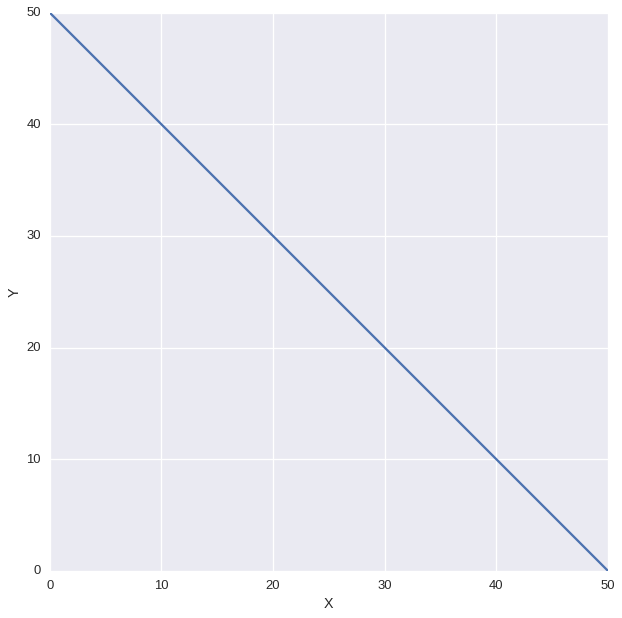

In [34]:
import tempfile

x = np.linspace(0, 50)
y = np.linspace(50, 0)
fig = plt.figure(figsize=(10, 10), dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, '-')
ax.set_xlabel('X')
ax.set_ylabel('Y')
f = tempfile.NamedTemporaryFile(
    dir='/home/louisf/Documents/Insight/massdriver/webapp/static/temp',
    suffix='.png', delete=False
)
plt.savefig('/home/louisf/Documents/Insight/massdriver/webapp/static/temp/A.png')
plt.savefig(f, bbox_inches='tight')
f.close()